In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import scipy.stats as st
import hypothesis_tests1 as ht

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("final_df-Copy1.csv",index_col=0)
df.head()

,Player,FG%,3P%,2P%,FT%,ORB/G,DRB/G,TRB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G,POS,height,weight
0,A.C. Green,0.442,0.062,0.448,0.675,1.890,3.722,5.615,0.865,0.633,0.202,0.602,1.572,5.440,PF,203.0,106.0
1,A.J. Guyton,0.384,0.382,0.381,0.824,0.285,0.750,1.035,1.870,0.245,0.155,0.775,0.785,5.710,PG,208.0,99.0
2,A.J. Hammons,0.405,0.500,0.375,0.450,0.360,1.270,1.640,0.180,0.050,0.590,0.450,0.950,2.180,C,198.0,99.0
3,A.J. Price,0.373,0.273,0.447,0.632,0.251,1.093,1.344,1.971,0.401,0.021,0.753,0.735,5.578,PG,213.0,124.0
4,Aaron Brooks,0.410,0.359,0.444,0.838,0.403,1.268,1.671,3.174,0.591,0.134,1.582,1.932,9.604,PG,183.0,73.0


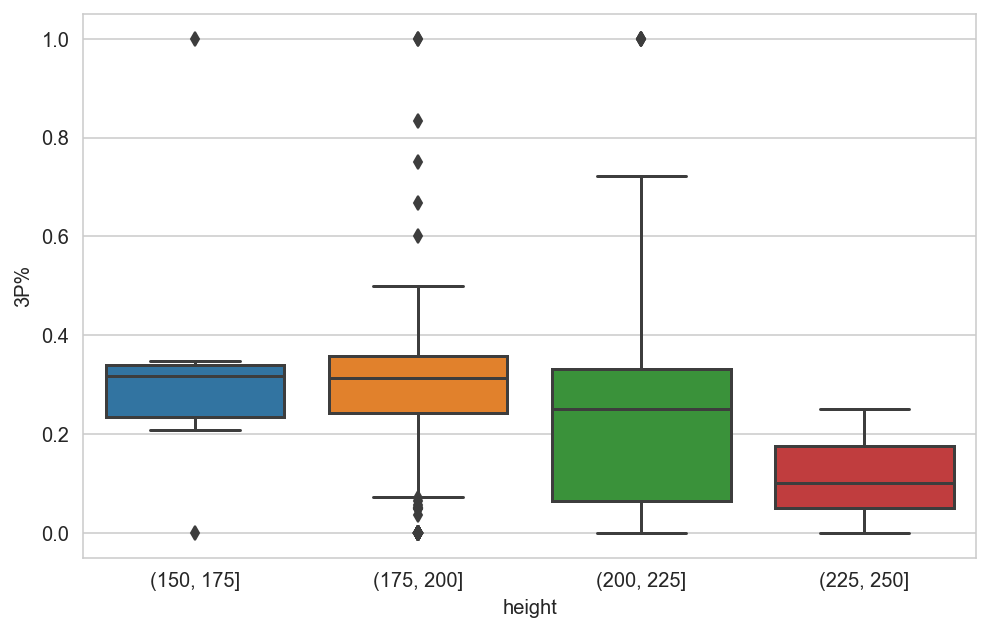

In [3]:
height = pd.cut(df.height, range(150, 275, 25))
shoot_per = df["3P%"]

#Explore the data to see if there is a visible difference between the values so we can set our hypothesis.
ht.Two_Sample_Test.explore_data(height, shoot_per)


In [4]:
short_players = df.loc[df['height'] < 200]
tall_players = df.loc[df['height'] > 200]

sh_pl_h = short_players.height
sh_pl_3p = round(short_players['3P%'],3)

tall_pl_h = tall_players.height
tall_pl_3p = round(tall_players['3P%'],3)

print(len(short_players))
print(len(tall_players))

724
834


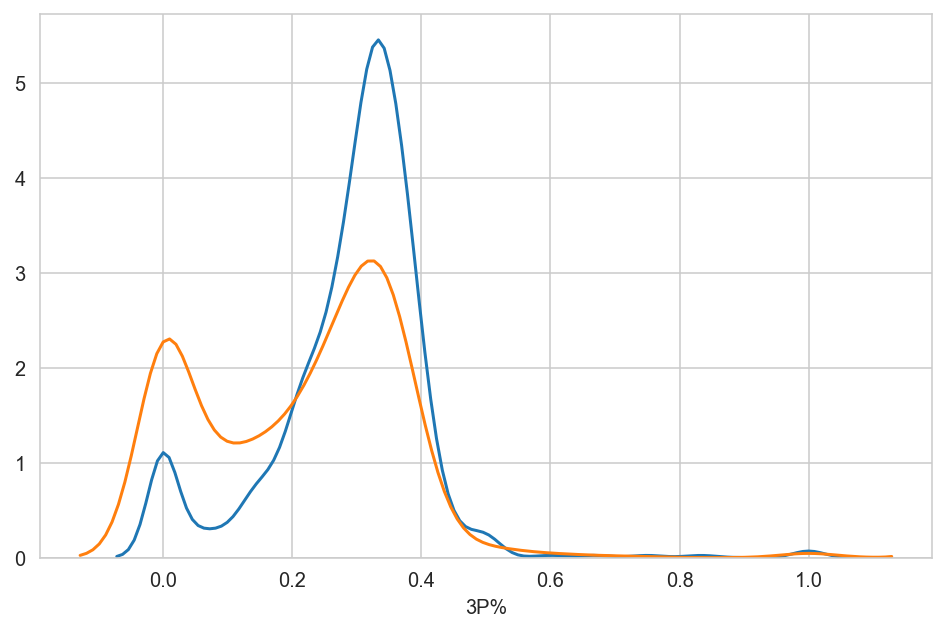

In [5]:
ht.Two_Sample_Test.overlapping_visual(sh_pl_3p, tall_pl_3p)

Since our dataset is non-normal, that means we'll need to use the Central Limit Theorem.

esc + m + enter

Now that we have helper functions to help us sample with replacement and calculate sample means, we just need to bring it all together and write a function that creates a sample distribution of sample means!

In [6]:
dist_size = 100
short_dist = ht.CLT.create_sample_distribution(sh_pl_3p, dist_size, n=30)
tall_dist = ht.CLT.create_sample_distribution(tall_pl_3p, dist_size, n=30)

In [7]:
print(short_dist[:5])
print(tall_dist[:5])

[0.27113333333333334, 0.28270000000000006, 0.2820666666666666, 0.3284, 0.3303666666666667]
[0.23850000000000005, 0.24206666666666668, 0.1875666666666667, 0.21263333333333334, 0.21103333333333332]


# Visualizations of Sample Distributions


We will create sample distributions for 3P% of both short players and tall players

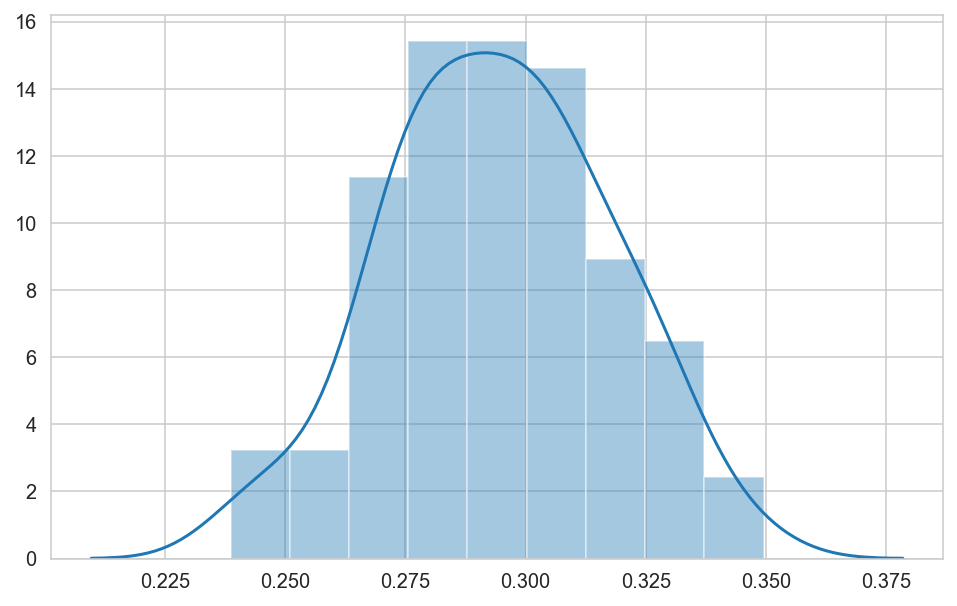

NormaltestResult(statistic=0.39823632373975526, pvalue=0.819453059506217)


In [8]:
ht.Two_Sample_Test.visualize_sample_dist(short_dist)

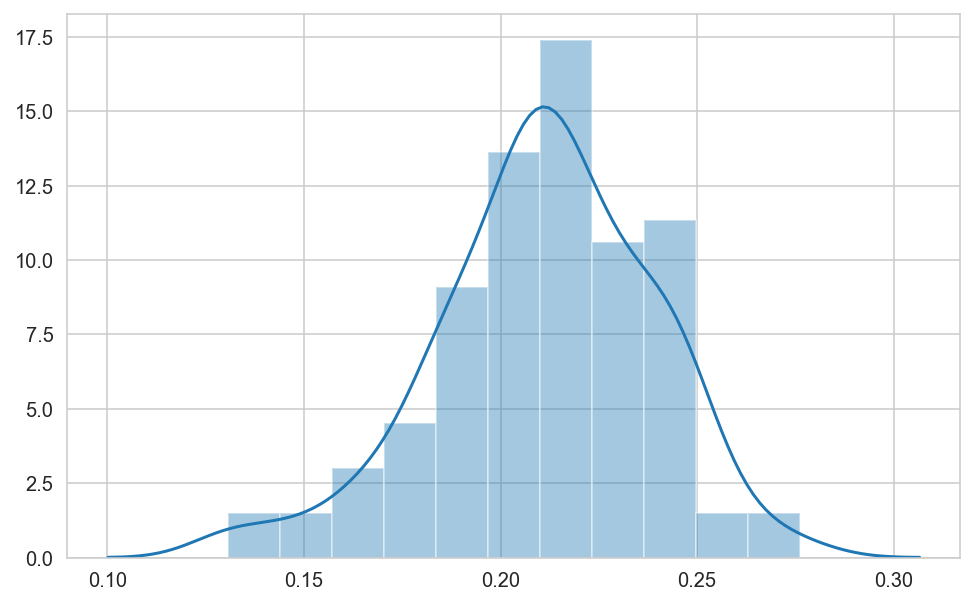

NormaltestResult(statistic=4.766627665037914, pvalue=0.09224438800750825)


In [9]:
ht.Two_Sample_Test.visualize_sample_dist(tall_dist)

It is always a good idea to create a plot of the probability distributions for samples to visually inspect the differences present between mean and standard deviation. Plot both samples' distributions and inspect the overlap using seaborn to get an idea of how different the samples might be from one another.

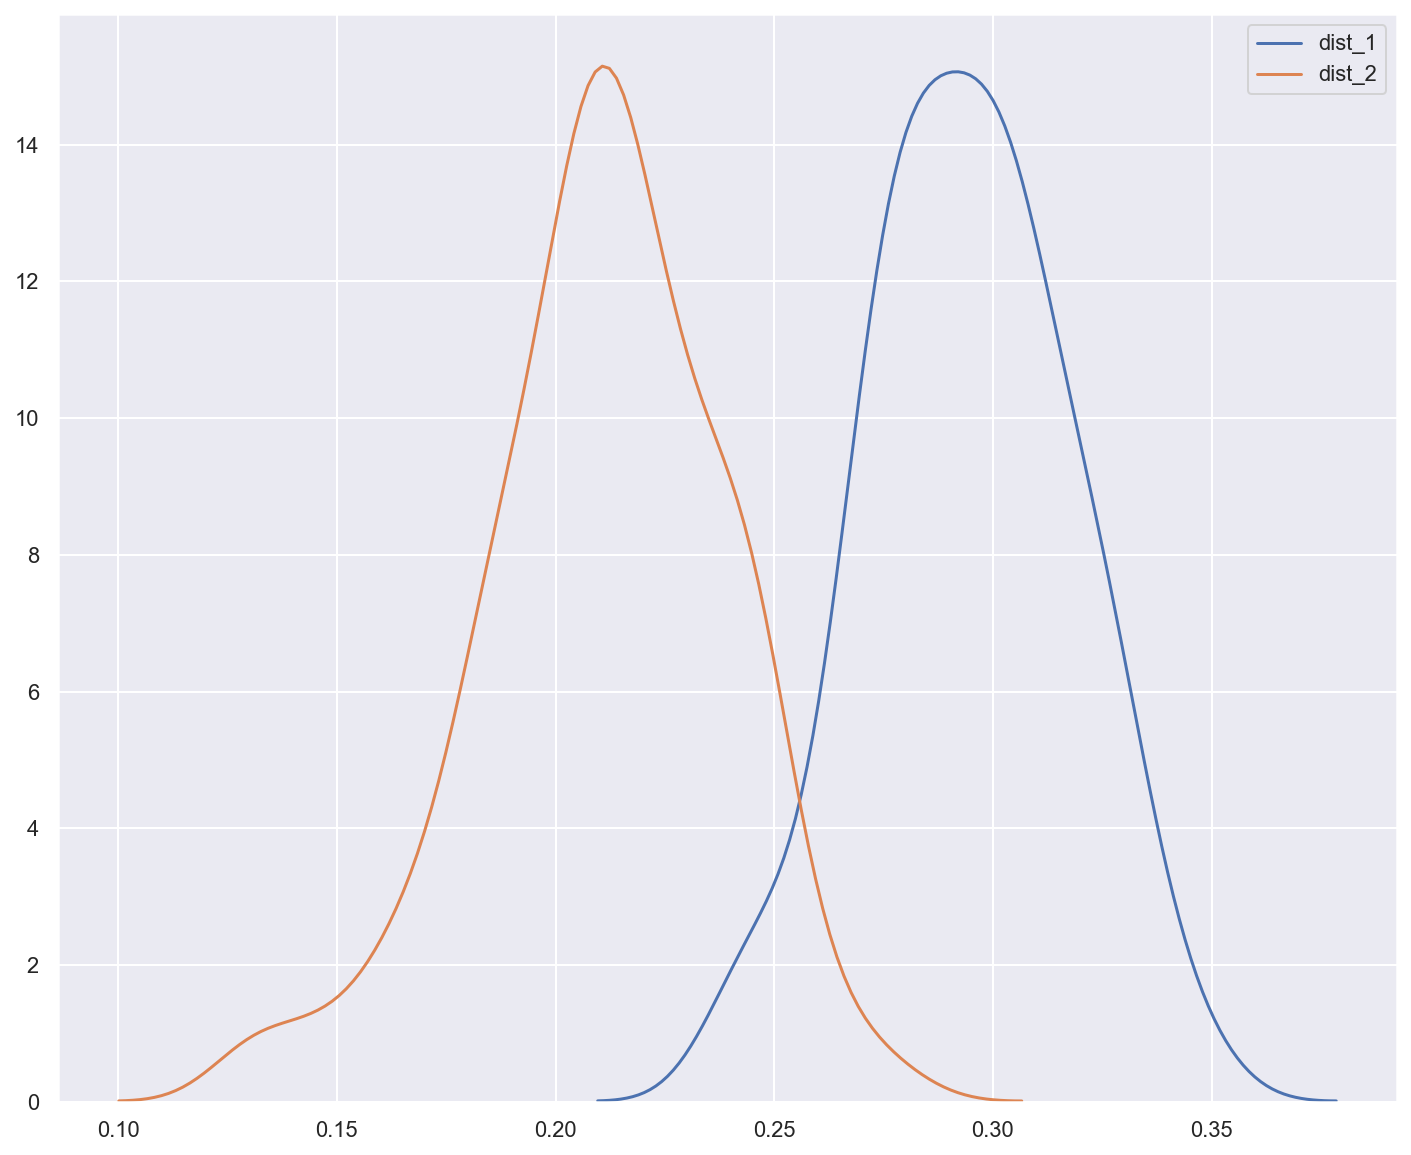

In [10]:
# Create a plot showing overlapping of distribution means and sds for inspection
ht.Two_Sample_Test.visualize_dist(short_dist, tall_dist)

1) Set up null and alternative hypotheses   
2) Choose a significance level   
3) Calculate the test statistic   
4) Determine the critical or p-value (find the rejection region)   
5) Compare t-value with critical t-value to reject or fail to reject the null hypothesis 

## The Null Hypothesis


>**$H_{0}$: The mean difference between short players' 3 point shooting percentage and tall players' 3 point shooting percentage is zero. i.e. $\mu_{0} = \mu_{1}$**

## The Alternate Hypothesis

In this example, the alternative hypothesis is that there is in fact a mean difference in 3 Points Shooting Percentage between short players and tall players.

>**$H_{1}$ (2-tailed): The parameter of interest, our mean difference between short peoples' 3 point shooting percentage and tall players' 3 point shooting percentage, is different than zero.**

>**$H_{1}$ (1-tailed, >): TThe mean difference between short players' 3 point shooting percentage and tall players' 3 point shooting percentage is greater than zero.**

>**$H_{1}$ (1-tailed, <): The mean difference between short players' 3 point shooting percentage and tall players' 3 point shooting percentage is less than zero.**

NOTE: The null hypothesis and alternative hypothesis are concerned with the true values, or in other words the parameter of the overall population. Through the process of experimentation/hypothesis testing and statistical analysis of the results, we will make an inference about this population parameter.

Now, calculate the mean difference between both groups.

In [11]:
mean_diff = round(np.mean(short_dist) - np.mean(tall_dist), 3)

n_short = len(short_dist)
n_tall = len(tall_dist)

dof = (n_short + n_tall - 2)
alpha = 0.5

t_crit = ht.Two_Sample_Test.t_crit(alpha, dof)
t_crit

0.6757308423854822

In [12]:
result  = ht.Two_Sample_Test.t_test(short_dist, tall_dist)
print(result)
t_stat = result[0]
p_value = result[1]

Ttest_indResult(statistic=23.094964741500256, pvalue=4.371717695405826e-58)


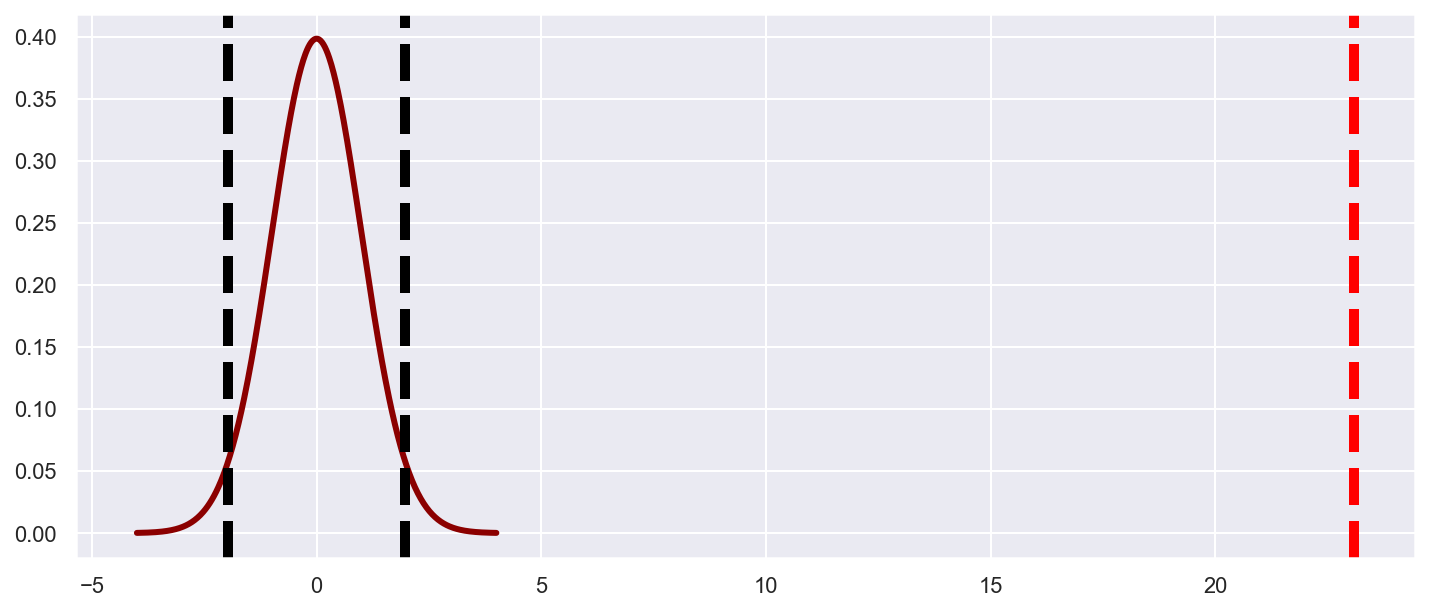

In [13]:
ht.Two_Sample_Test.visualize_t(t_stat, n_short, n_tall)

In [14]:
ht.Two_Sample_Test.conclusion(result, t_crit, alpha)

Null hypothesis rejected. H1 is accepted. Results are statistically significant with t-value = 23.09 critical t-value = 0.6757308423854822 and p-value = 0.0
